<Axes: >

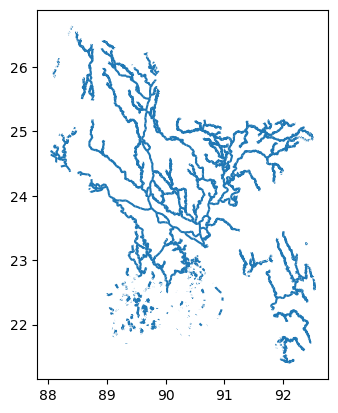

In [8]:
import geopandas as gpd
swotdf= gpd.read_file(r"/Users/sharm/Documents/SWOT/SWOT_Operational.shp")
# print(swotdf)
swotdf.plot()

In [2]:
import dask
import dask.dataframe as dd
from dask.distributed import Client

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pprint
import requests

import datetime
from io import StringIO
FTS_URL = "https://fts.podaac.earthdata.nasa.gov/v1"  
HYDROCRON_URL = "https://soto.podaac.earthdatacloud.nasa.gov/hydrocron/v1/timeseries"

def query_hydrocron(query_url, reach_id, start_time, end_time, fields, empty_df):
    """Query Hydrocron for reach-level time series data.

    Parameters
    ----------
    query_url: str - URL to use to query FTS
    reach_id: str - String SWORD reach identifier
    start_time: str - String time to start query
    end_time: str - String time to end query
    fields: list - List of fields to return in query response
    empty_df: pandas.DataFrame that contains empty query results

    Returns
    -------
    pandas.DataFrame that contains query results
    """

    params = {
        "feature": "Reach",
        "feature_id": reach_id,
        "output": "csv",
        "start_time": start_time,
        "end_time": end_time,
        "fields": fields
    }
    results = requests.get(query_url, params=params)
    if "results" in results.json().keys():
        results_csv = results.json()["results"]["csv"]
        df = pd.read_csv(StringIO(results_csv))
    else:
        df = empty_df

    return df

In [5]:
recorddf=pd.DataFrame(columns=['reach_id','records'])
station_file=pd.read_csv(r"/Users/sharm/Documents/SWOT/SWOT_reach_id_BD.csv")
ids=station_file['reach_id']
for reach in ids:
    swot_df = pd.read_csv('/Users/sharm/Documents/SWOT/WSE_2/'+str(reach)+'.csv')
    recorddf.loc[len(recorddf)]=[reach,swot_df.shape[0]-1]
    print(reach,swot_df.shape[0]-1)#Counting Swot    

45100500191 57
45100500201 57
45100500211 55
45100500221 58
45100500231 0
45100500241 58
45100500251 0
45100500261 0
45100500271 58
45100500281 58
45100500291 58
45100500301 58
45100500321 50
45100500741 0
45100500753 0
45100500761 0
45100500773 0
45100500783 0
45100500791 57
45100500801 30
45100500811 0
45100500821 0
45100500831 0
45100500841 0
45100500861 0
45100500165 0
45100500175 0
45100500185 0
45100500351 19
45100501135 0
45100501145 0
45100501155 0
45100501175 0
45100500945 58
45100501255 0
45100501005 0
45100500336 0
45100500876 0
45100500366 0
45100501186 0
45100500686 0
45100501056 0
45100501076 0
45100500956 0
45100500976 0
45100501016 0
45100601503 0
45100601511 0
45100601521 0
45100601531 0
45100601541 0
45100601551 0
45100601564 0
45100601571 0
45100600103 0
45100601091 50
45100601101 54
45100601603 0
45100600123 0
45100601113 58
45100601121 48
45100601133 50
45100601143 58
45100601151 -1
45100600133 0
45100600143 48
45100600151 0
45100601413 0
45100601431 0
45100601163 

45253000301 53
45253001611 0
45253002131 0
45253002141 0
45253000361 0
45253000321 56
45253000331 51
45253000341 32
45253000351 0
45253001141 51
45253001151 76
45253001731 0
45253001891 0
45253001661 0
45253001671 0
45253001681 0
45253000801 57
45253000811 57
45253000821 0
45253000831 57
45253000841 53
45253000851 54
45253000861 47
45253001931 0
45253001911 0
45253001761 0
45253001771 0
45253001781 0
45253001791 0
45253001801 0
45253001811 0
45253001821 0
45253001621 0
45253000605 0
45253001995 0
45253000045 0
45253000055 55
45253000065 53
45253002035 0
45253000075 0
45252000555 36
45252000565 34
45252000575 44
45253000105 0
45253000115 0
45253000125 0
45253000135 0
45253002045 0
45252000585 0
45252000595 0
45252000605 0
45252000615 0
45252000625 0
45253000615 0
45253000625 0
45253000635 0
45253000645 0
45253000655 0
45253000665 0
45253000675 0
45253000685 0
45253000695 0
45253000705 0
45253000715 0
45253000725 0
45253000735 0
45253000745 0
45253000755 0
45253000765 0
45253000775 0
452

In [6]:
print(recorddf)

        reach_id  records
0    45100500191       57
1    45100500201       57
2    45100500211       55
3    45100500221       58
4    45100500231        0
..           ...      ...
972  45220201186        0
973  45220402216        0
974  45220501296        0
975  45230000371        0
976  45230000381        0

[977 rows x 2 columns]


In [9]:
swotdf

,reach_id,width,river_name,geometry
0,45100500191,136.0,NODATA,"LINESTRING (92.01922 22.14863, 92.01951 22.148..."
1,45100500201,123.0,NODATA,"LINESTRING (92.11707 22.16030, 92.11701 22.160..."
2,45100500211,105.5,NODATA,"LINESTRING (92.14528 22.20029, 92.14540 22.200..."
3,45100500221,84.0,NODATA,"LINESTRING (92.17298 22.22054, 92.17269 22.220..."
4,45100500231,80.0,NODATA,"LINESTRING (92.23063 22.18581, 92.23075 22.185..."
...,...,...,...,...
1238,45220201186,67.0,Jhinai River,"LINESTRING (90.00202 24.39335, 90.00173 24.393..."
1239,45220402216,277.5,NODATA,"LINESTRING (90.89790 24.55605, 90.89784 24.556..."
1240,45220501296,42.0,NODATA,"LINESTRING (91.27105 24.35537, 91.27075 24.355..."
1241,45230000371,0.0,NODATA,"LINESTRING (89.99861 23.28778, 89.99882 23.287..."


In [10]:
merged_gdf = swotdf.merge(recorddf, on='reach_id', how='left')
merged_gdf.to_file(r"/Users/sharm/Documents/SWOT/Geojson/records.geojson", driver="GeoJSON")

In [16]:
print(merged_gdf)

         reach_id  width    river_name  \
0     45100500191  136.0        NODATA   
1     45100500201  123.0        NODATA   
2     45100500211  105.5        NODATA   
3     45100500221   84.0        NODATA   
4     45100500231   80.0        NODATA   
...           ...    ...           ...   
1238  45220201186   67.0  Jhinai River   
1239  45220402216  277.5        NODATA   
1240  45220501296   42.0        NODATA   
1241  45230000371    0.0        NODATA   
1242  45230000381   54.0        NODATA   

                                               geometry  records  
0     LINESTRING (92.01922 22.14863, 92.01951 22.148...     58.0  
1     LINESTRING (92.11707 22.16030, 92.11701 22.160...     58.0  
2     LINESTRING (92.14528 22.20029, 92.14540 22.200...     56.0  
3     LINESTRING (92.17298 22.22054, 92.17269 22.220...     59.0  
4     LINESTRING (92.23063 22.18581, 92.23075 22.185...      1.0  
...                                                 ...      ...  
1238  LINESTRING (90.00202

<Axes: >

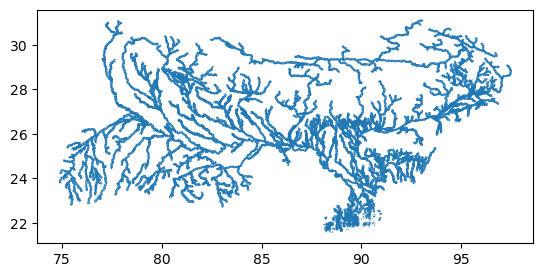

In [3]:
import geopandas as gpd#shapefile read 
gbmdf= gpd.read_file(r"/Users/sharm/Documents/SWOT/gbm_clip.shp")
#print(gbmdf)
gbmdf.plot()

In [2]:
import os
import dask
import dask.dataframe as dd
from dask.distributed import Client

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pprint
import requests

import datetime
from io import StringIO
FTS_URL = "https://fts.podaac.earthdata.nasa.gov/v1"  
HYDROCRON_URL = "https://soto.podaac.earthdatacloud.nasa.gov/hydrocron/v1/timeseries"

def query_hydrocron(query_url, reach_id, start_time, end_time, fields, empty_df):
    """Query Hydrocron for reach-level time series data.

    Parameters
    ----------
    query_url: str - URL to use to query FTS
    reach_id: str - String SWORD reach identifier
    start_time: str - String time to start query
    end_time: str - String time to end query
    fields: list - List of fields to return in query response
    empty_df: pandas.DataFrame that contains empty query results

    Returns
    -------
    pandas.DataFrame that contains query results
    """

    params = {
        "feature": "Reach",
        "feature_id": reach_id,
        "output": "csv",
        "start_time": start_time,
        "end_time": end_time,
        "fields": fields
    }
    results = requests.get(query_url, params=params)
    if "results" in results.json().keys():
        results_csv = results.json()["results"]["csv"]
        df = pd.read_csv(StringIO(results_csv))
    else:
        df = empty_df

    return df

In [3]:
gbm_file=pd.read_csv(r"/Users/sharm/Documents/SWOT/gbm.csv")

In [4]:
gbm_file['reach_id']
ids=gbm_file['reach_id']
ids 

0       45220200994
1       45220200131
2       45220200144
3       45220200151
4       45220201061
           ...     
7202    45249900536
7203    45230000371
7204    45230000381
7205    45311301135
7206    45220600216
Name: reach_id, Length: 7207, dtype: int64

In [5]:
# Create queries that return Pandas.DataFrame objects
start_time = "2023-01-01T00:00:00Z"
end_time = "2025-09-03T00:00:00Z"
fields = "reach_id,time_str,wse"

for reach in ids:
    #pathname = r"/Users/sharm/Documents/SWOT/GBM/"+str(reach)+'.csv'#condition not to download the same files
    #if os.path.exists(pathname) == False:
        # Create an empty dataframe for cases where no data is returned for a reach identifier
        empty_df = pd.DataFrame({
            "reach_id": np.int64(reach),
            "time_str": datetime.datetime(1900, 1, 1).strftime("%Y-%m-%dT%H:%M:%S"),
            "wse": -99.0,
            "wse_units": "m"
        }, index=[0])
        results = query_hydrocron(HYDROCRON_URL, reach, start_time, end_time, fields, empty_df)

   
        ddf = results.loc[(results["wse"] != -999999999999.0)]

        # # Convert time_str to datetime format
        ddf.time_str = pd.to_datetime(ddf.time_str)
        ddf['Date'] = ddf.time_str
        ddf.set_index('Date', inplace=True)
        ddf1=ddf.drop(['time_str'],axis=1)
        ddf1.to_csv(r"/Users/sharm/Documents/SWOT/GBM/"+str(reach)+'.csv')
        #ddf1.to_csv(pathname) #downloading csv file for reach_id using ids loop

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.time_str = pd.to_datetime(ddf.time_str)
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Date'] = ddf.time_str
/var/folders/xs/q2dhvqyj0d73drhqgbz0qnf00000gp/T/ipykernel_1299/2418173528.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [6]:
recordgbmdf=pd.DataFrame(columns=['reach_id','records'])#creating dataframe
gbm_file=pd.read_csv(r"/Users/sharm/Documents/SWOT/gbm.csv")
ids=gbm_file['reach_id']
for reach in ids:
    gbm_df = pd.read_csv('/Users/sharm/Documents/SWOT/GBM/'+str(reach)+'.csv')
    recordgbmdf.loc[len(recordgbmdf)]=[reach,gbm_df.shape[0]]
    print(reach,gbm_df.shape[0])#Counting gbm   

45220200994 1
45220200131 1
45220200144 1
45220200151 1
45220201061 1
45220201091 1
45220201121 1
45220201141 1
45220201151 1
45220201081 1
45220201171 1
45253002061 1
45220200344 1
45220200121 1
45220201011 1
45220201021 1
45220201041 1
45220201071 1
45220201111 1
45220201131 1
45253002015 1
45220200885 1
45220200855 1
45230000365 1
45253002005 1
45220200455 1
45220200465 1
45220200475 1
45220200485 1
45220200495 1
45220200505 1
45220200515 1
45220200525 1
45220200535 58
45220200245 1
45220200895 1
45220200845 29
45220200775 43
45220200045 1
45220200051 1
45220200061 1
45220200071 1
45220200081 1
45220200091 1
45220200101 1
45220200111 1
45220200715 53
45220200965 51
45220200935 57
45220200635 49
45220200665 35
45220200795 46
45220200785 40
45220200765 42
45220200735 51
45220200725 56
45220200295 1
45220200985 46
45220200915 1
45220200875 1
45253002025 1
45220200305 1
45220200745 41
45220200025 1
45220200035 1
45220200545 58
45220200595 56
45220200325 58
45220200335 1
45220200015 1
45

45241600031 44
45241600041 44
45241600051 43
45241600061 52
45241600071 53
45241600311 48
45241600321 46
45241600331 54
45241600341 49
45241601331 1
45241600081 51
45241600091 47
45241600101 48
45241600113 1
45241600121 45
45241600141 44
45241600151 48
45241600161 49
45241600171 1
45241600181 81
45241600191 81
45241600201 78
45241600211 53
45241600221 52
45241600234 1
45241600241 51
45241600661 73
45241600711 50
45241600721 33
45241600731 29
45241600741 29
45241600961 57
45241601231 1
45241601241 1
45241601251 1
45241601261 1
45241601271 33
45241601131 1
45241601141 1
45241601151 1
45241601161 1
45241601171 1
45241601181 1
45241601191 1
45241601204 1
45241601211 1
45241600481 1
45241600491 60
45241600501 79
45241600591 54
45241600601 56
45241600611 56
45241600621 83
45241600691 72
45241600761 29
45241600771 29
45241600781 29
45241601291 1
45241601301 1
45241600351 49
45241600361 54
45241600891 53
45241600901 54
45241600911 54
45241600921 56
45241600931 55
45241600941 56
45241600371 53


45243600511 1
45243600521 1
45243600721 55
45243600731 29
45243600741 29
45243600771 28
45243600791 1
45243600804 1
45243600811 1
45243600821 57
45243600831 86
45243600841 84
45243600854 1
45243600863 1
45243600871 58
45243600884 1
45243600891 58
45243600901 28
45243601031 0
45243601041 1
45243601061 0
45243601211 54
45243601221 54
45243601241 55
45243601251 55
45243601261 1
45243601271 56
45243601281 1
45243601291 56
45243601071 1
45243601081 0
45243601091 4
45243601101 56
45243601114 1
45243601121 56
45243601134 1
45243601141 56
45243601154 1
45243601161 1
45243601171 56
45243601181 56
45243601191 25
45243600531 1
45243600544 1
45243600561 1
45243600571 1
45243600581 57
45243600591 51
45243600611 57
45243600621 1
45243600631 57
45243600641 56
45243600651 58
45243600661 84
45243600671 80
45243600101 1
45243600111 1
45243600121 1
45243600131 1
45243600143 1
45243600161 1
45243601951 1
45243600231 56
45243600691 85
45243600701 85
45243600711 56
45243601591 1
45243601721 56
45243601731 5

45252000161 85
45252000171 1
45252000181 84
45252000191 85
45252000204 1
45252000211 58
45252000771 1
45252000781 1
45252000231 58
45252000251 58
45252000261 54
45252000271 54
45252000281 54
45252000291 58
45252000301 54
45252000311 56
45252000631 1
45252000641 1
45252000651 1
45252000671 1
45252000681 1
45252000321 54
45252000331 58
45252000341 1
45252000354 1
45252000361 58
45252000371 58
45252000381 53
45252000401 56
45252000411 58
45252000421 53
45252000481 1
45252000441 57
45252000451 1
45252000461 1
45252000025 1
45252000505 46
45252000515 47
45252000525 44
45252000535 32
45252000545 38
45252000745 1
45252000035 1
45252000045 1
45252000055 1
45252000065 1
45252000075 1
45252000085 1
45252000736 1
45252000666 1
45252000696 1
45252000436 1
45252000496 1
45252000476 1
45252000756 1
45253000085 1
45253000095 1
45253000151 84
45253001721 1
45253001951 1
45253000171 84
45253001691 1
45253001701 1
45253001711 1
45253000191 54
45253000211 39
45253000881 51
45253000891 54
45253000911 79
4

45257000301 60
45257000311 59
45257000286 1
45257000326 1
45258000011 30
45258000461 1
45258000471 1
45258000491 1
45258000021 60
45258000031 30
45258000041 30
45258000051 72
45258000061 87
45258000071 57
45258000081 58
45258000091 58
45258000101 72
45258000391 1
45258000411 1
45258000111 77
45258000121 55
45258000131 37
45258000141 58
45258000151 58
45258000161 37
45258000171 37
45258000301 45
45258000371 55
45258000181 37
45258000191 35
45258000201 47
45258000211 52
45258000221 56
45258000231 56
45258000241 49
45258000251 56
45258000261 56
45258000281 56
45258000311 56
45258000321 56
45258000331 56
45258000351 55
45258000506 1
45258000426 1
45258000386 1
45258000296 1
45258000366 1
45259200011 75
45259200021 82
45259200031 53
45259200041 55
45258000441 56
45258000456 1
45259300011 75
45259300021 85
45259300031 56
45259300041 58
45259400061 56
45259400071 58
45259400081 1
45259400091 1
45259400101 1
45259400021 55
45259400031 54
45259400116 1
45259400046 1
45259500011 56
45259500021 7

45291001441 1
45291001451 1
45291000721 50
45291001751 1
45291001746 1
45291001646 1
45291001556 1
45291001496 1
45291001406 1
45291001246 1
45291001166 1
45291001206 1
45291000976 1
45291000916 1
45291000766 1
45291000816 1
45291000636 1
45291000786 1
45291000596 1
45291000536 1
45291001516 1
45291001336 1
45291001366 1
45291001146 1
45291001286 1
45291000506 1
45291001696 1
45291000666 1
45291001666 1
45291000876 1
45291001466 1
45291000736 1
45291001766 1
45292000011 30
45292000021 31
45292000911 58
45292000921 59
45292000951 59
45292000041 59
45292000261 61
45292000981 57
45292000051 59
45292000061 1
45292000071 1
45292000081 1
45292000091 1
45292000671 56
45292000681 55
45292000691 52
45292000701 57
45292000711 1
45292000721 56
45292000281 61
45292000291 60
45292000301 1
45292000311 1
45292000861 29
45292000811 1
45292000881 50
45292000891 59
45292000101 1
45292000111 1
45292000121 1
45292000131 1
45292000331 1
45292000341 1
45292000791 1
45292000361 1
45292000371 1
45292000471 1


45220200195 1
45220200225 1
45220200235 1
45220200655 41
45220200705 29
45220200685 44
45220200695 31
45220200945 85
45220300025 1
45220300015 1
45220300035 1
45220300365 40
45230000025 56
45230000015 56
45230000275 54
45230000065 1
45230000055 84
45230000045 1
45230000295 51
45230000335 58
45230000085 56
45230000075 75
45230000315 82
45230000325 1
45230000255 49
45230000285 1
45230000231 1
45311100165 77
45230000125 1
45230000135 58
45230000145 1
45230000155 1
45230000246 1
45230000166 1
45243803571 55
45243803581 139
45243803601 141
45243802221 54
45243802234 0
45243802241 1
45243802351 53
45243800361 1
45243800371 1
45243800381 1
45243800391 1
45243800401 1
45243800411 1
45243801521 54
45243801531 54
45243801541 55
45243801551 55
45243801561 54
45243801571 1
45243803001 55
45243803021 1
45243800421 1
45243800431 1
45243800444 1
45243800454 1
45243800463 1
45243800483 1
45243800493 1
45243800523 1
45243800531 1
45243800541 1
45243800551 1
45243800561 1
45243800571 1
45243800581 1
452

45244900041 144
45244900051 141
45244900061 143
45244900071 142
45244900081 143
45244900091 142
45244900101 145
45244900111 144
45244900341 1
45244900361 1
45244900131 146
45244900141 143
45244900151 136
45244900161 118
45244900171 140
45244900181 138
45244900191 146
45244900201 54
45244900211 72
45244900221 143
45244900241 136
45244900251 145
45244900261 144
45244900271 145
45244900376 1
45244900286 1
45245600741 52
45245600751 51
45245600761 1
45245600771 68
45245600781 80
45245600241 138
45245600791 80
45245600801 78
45245600811 79
45245600821 76
45245600831 77
45245600841 51
45245600851 63
45245600861 76
45245600871 75
45245600881 77
45245600891 78
45245600251 139
45245600261 137
45245600271 133
45245600281 54
45245600291 140
45245600301 160
45245600331 49
45245600341 52
45245600351 125
45245600361 132
45245600371 139
45245600381 139
45245600961 73
45245600971 59
45245600981 1
45245600991 1
45245601001 1
45245600311 168
45245600321 166
45245600391 141
45245600401 140
45245600411 50

45247200984 0
45247200991 39
45247201004 1
45247201021 82
45247202521 1
45247202534 1
45247202551 1
45247200551 55
45247200564 25
45247200571 55
45247200584 1
45247200591 1
45247200604 1
45247200611 1
45247200621 84
45247200634 1
45247200641 54
45247200661 55
45247200674 1
45247200684 0
45247200691 82
45247201031 53
45247202721 1
45247202731 1
45247202741 1
45247202811 1
45247202821 1
45247202831 1
45247201341 1
45247201354 1
45247201361 1
45247201374 0
45247201381 58
45247201394 0
45247201401 34
45247201414 19
45247202101 52
45247202114 1
45247202124 0
45247202131 42
45247202144 0
45247202151 58
45247202164 0
45247202171 48
45247202184 0
45247202191 38
45247202204 11
45247201071 57
45247201084 0
45247201091 54
45247201104 0
45247201111 58
45247201124 0
45247201131 39
45247201421 1
45247201434 0
45247201441 41
45247201454 19
45247201044 1
45247201051 53
45247201064 1
45247201461 1
45247201474 1
45247201484 0
45247201494 1
45247201501 52
45247201514 1
45247201524 1
45247201531 53
452472

45247801086 1
45247801756 1
45247801456 1
45247801406 1
45247801116 1
45247800706 1
45247801686 1
45247801366 1
45247801346 1
45247900011 57
45248100231 56
45248100281 56
45248100291 57
45248100301 57
45248100311 56
45248100321 57
45248100331 57
45248100341 57
45248100351 57
45248100361 124
45248100371 141
45248100381 145
45248100391 56
45248100401 56
45248100411 55
45248100431 1
45248100241 56
45248100251 56
45248100261 56
45248100271 55
45248100081 1
45248100091 1
45248100101 1
45248100111 1
45248100121 1
45248100131 1
45248100141 1
45248100191 1
45248100201 1
45248100211 1
45248100221 1
45248100041 1
45248100051 1
45248100061 1
45248100071 1
45248100031 1
45248100161 1
45248100171 1
45248100181 1
45248100151 1
45248100011 1
45248100021 1
45248100451 172
45248100461 173
45248100471 135
45248100446 1
45248100486 1
45248200021 55
45248200031 62
45248200041 82
45248200051 60
45248200061 53
45248200071 51
45248200141 1
45248200161 1
45248200081 73
45248200091 59
45248200101 78
4524820012

45248900931 51
45248900941 1
45248900954 1
45248901801 50
45248901821 25
45248900961 1
45248900974 1
45248900981 1
45248900994 1
45248901001 1
45248901014 1
45248901021 53
45248901034 1
45248901041 1
45248901054 1
45248901061 58
45248901074 1
45248901331 1
45248901344 1
45248901351 51
45248901364 0
45248901371 53
45248901384 0
45248901391 52
45248901404 0
45248901421 1
45248901461 1
45248901474 1
45248901481 1
45248901494 1
45248901501 53
45248901514 0
45248901521 53
45248901534 0
45248901541 1
45248900561 1
45248900573 1
45248900594 1
45248900601 1
45248900614 1
45248900621 1
45248900631 1
45248900644 0
45248900651 1
45248900664 1
45248901554 1
45248901561 72
45248901871 58
45248902021 59
45248902034 1
45248901131 52
45248901144 0
45248902273 1
45248901574 1
45248901581 1
45248901594 1
45248901601 1
45248901614 1
45248901621 1
45248901634 1
45248901641 53
45248901654 0
45248901661 1
45248901674 0
45248901681 53
45248901694 0
45248901701 50
45248901714 0
45248901151 52
45248901164 0
45

45311701075 1
45311701105 1
45311701315 1
45311700825 58
45311700835 83
45311700495 84
45311700065 58
45311700575 56
45311700025 55
45311700145 55
45311700465 85
45311700775 53
45311701155 1
45311701145 1
45311700405 82
45311700395 85
45311700295 58
45311700275 58
45311701325 1
45311701335 1
45311701355 1
45311701265 1
45311700305 82
45311700785 84
45311700315 57
45311700325 59
45311700335 60
45311700345 77
45311700355 83
45311600115 1
45311700875 58
45311700705 85
45311700715 84
45311700935 48
45311700925 84
45311700915 82
45311701115 1
45311800105 35
45311701345 1
45311701235 1
45311700735 111
45311700725 83
45311700755 1
45311700765 48
45311700255 1
45311700795 78
45311700265 58
45311700805 82
45311701255 1
45311701175 1
45311700425 70
45311701295 1
45311701275 1
45311701285 1
45311701305 1
45311700245 58
45311700485 84
45311700175 55
45311700095 58
45311700085 58
45311700075 58
45311700105 58
45311700365 85
45311700375 85
45311700965 77
45311700955 57
45311700516 1
45311700846 1
45

In [7]:
print(recordgbmdf)

         reach_id  records
0     45220200994        1
1     45220200131        1
2     45220200144        1
3     45220200151        1
4     45220201061        1
...           ...      ...
7202  45249900536        1
7203  45230000371        1
7204  45230000381        1
7205  45311301135        1
7206  45220600216        1

[7207 rows x 2 columns]


In [8]:
merged_gdfgbm = gbmdf.merge(recordgbmdf, on='reach_id', how='left')
merged_gdfgbm.to_file(r"/Users/sharm/Documents/SWOT/Geojson/recordsGBM.geojson", driver="GeoJSON")#record save gbm

In [9]:
recordgbmdf['reach_id'] = recordgbmdf['reach_id'].astype(int)
recordgbmdf.to_csv(r"/Users/sharm/Documents/SWOT/recordsgbm.csv", index=False)#csv save gbm


<Axes: >

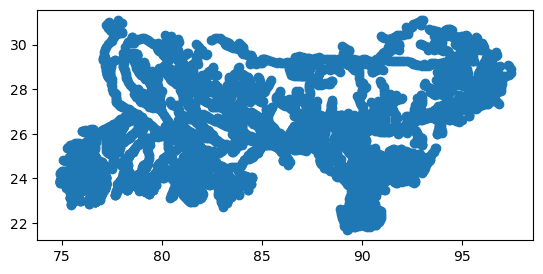

In [27]:
import geopandas as gpd#shapefile read 
gbmdf_op= gpd.read_file(r"/Users/sharm/Documents/SWOT/GBM_points.shp")
gbmdf_op = gbmdf_op.drop(columns=['records'])
# print(gbmdf_op)
gbmdf_op.plot()

In [28]:
gbm_file_op=pd.read_csv(r"/Users/sharm/Documents/SWOT/GBM_points.csv")
gbm_file_op['reach_id']
ids=gbm_file_op['reach_id']
ids 

0       45220200994
1       45220200131
2       45220200144
3       45220200151
4       45220201061
           ...     
7052    45249900536
7053    45230000371
7054    45230000381
7055    45311301135
7056    45220600216
Name: reach_id, Length: 7057, dtype: int64

In [29]:
recordgbmdf_op=pd.DataFrame(columns=['reach_id','records'])#creating dataframe
gbm_file_op=pd.read_csv(r"/Users/sharm/Documents/SWOT/GBM_points.csv")
ids=gbm_file_op['reach_id']
for reach in ids:
    gbm_df_op = pd.read_csv('/Users/sharm/Documents/SWOT/GBM/'+str(reach)+'.csv')
    recordgbmdf_op.loc[len(recordgbmdf_op)]=[reach,gbm_df_op.shape[0]-1]
    print(reach,gbm_df_op.shape[0]-1)#Counting gbm  
print("Total reach_id processed:", len(recordgbmdf_op))

45220200994 0
45220200131 0
45220200144 0
45220200151 0
45220201061 0
45220201091 0
45220201121 0
45220201141 0
45220201151 0
45220201081 0
45220201171 0
45253002061 0
45220200344 0
45220200121 0
45220201011 0
45220201021 0
45220201041 0
45220201071 0
45220201111 0
45220201131 0
45253002015 0
45220200885 0
45220200855 0
45230000365 0
45253002005 0
45220200455 0
45220200465 0
45220200475 0
45220200485 0
45220200495 0
45220200505 0
45220200515 0
45220200525 0
45220200535 57
45220200245 0
45220200895 0
45220200845 28
45220200775 42
45220200045 0
45220200051 0
45220200061 0
45220200071 0
45220200081 0
45220200091 0
45220200101 0
45220200111 0
45220200715 52
45220200965 50
45220200935 56
45220200635 48
45220200665 34
45220200795 45
45220200785 39
45220200765 41
45220200735 50
45220200725 55
45220200295 0
45220200985 45
45220200915 0
45220200875 0
45253002025 0
45220200305 0
45220200745 40
45220200025 0
45220200035 0
45220200545 57
45220200595 55
45220200325 57
45220200335 0
45220200015 0
45

45241200075 0
45241200606 0
45241200326 0
45241200576 0
45241200736 0
45241200706 0
45241200526 0
45241300015 55
45241300055 51
45241300065 0
45241300074 49
45241300084 0
45241300191 0
45241300135 46
45241300175 44
45241300165 34
45241300025 0
45241300045 45
45241300095 50
45241300145 51
45241300155 48
45241300185 47
45241300105 48
45241300115 46
45241300126 0
45241400011 0
45241500011 53
45241500021 55
45241500031 55
45241600011 55
45241601371 0
45241600021 28
45241600031 43
45241600041 43
45241600051 42
45241600061 51
45241600071 52
45241600311 47
45241600321 45
45241600331 53
45241600341 48
45241601331 0
45241600081 50
45241600091 46
45241600101 47
45241600113 0
45241600121 44
45241600141 43
45241600151 47
45241600161 48
45241600171 0
45241600181 80
45241600191 80
45241600201 77
45241600211 52
45241600221 51
45241600234 0
45241600241 50
45241600661 72
45241600711 49
45241600721 32
45241600731 28
45241600741 28
45241600961 56
45241601231 0
45241601241 0
45241601251 0
45241601261 0
45

45243600091 55
45243601941 0
45243700021 85
45243601961 0
45243600171 0
45243600181 54
45243600191 53
45243600201 55
45243601981 0
45243601921 0
45243601901 0
45243600221 55
45243601991 0
45243602001 0
45243602031 0
45243600271 52
45243602011 0
45243600241 55
45243600251 55
45243602021 0
45243600291 81
45243600301 56
45243600311 0
45243600321 55
45243600334 0
45243600341 59
45243600351 0
45243600371 54
45243600381 0
45243600391 0
45243600401 0
45243600411 0
45243600761 -1
45243601321 35
45243601331 22
45243601341 34
45243601361 0
45243601371 57
45243601381 58
45243601391 58
45243601401 53
45243601414 0
45243601421 29
45243601434 0
45243601441 57
45243600421 0
45243600431 0
45243600441 0
45243600451 0
45243600461 0
45243600471 0
45243600481 0
45243600491 0
45243600501 0
45243600511 0
45243600521 0
45243600721 54
45243600731 28
45243600741 28
45243600771 27
45243600791 0
45243600804 0
45243600811 0
45243600821 56
45243600831 85
45243600841 83
45243600854 0
45243600863 0
45243600871 57
45

45252000781 0
45252000231 57
45252000251 57
45252000261 53
45252000271 53
45252000281 53
45252000291 57
45252000301 53
45252000311 55
45252000631 0
45252000641 0
45252000651 0
45252000671 0
45252000681 0
45252000321 53
45252000331 57
45252000341 0
45252000354 0
45252000361 57
45252000371 57
45252000381 52
45252000401 55
45252000411 57
45252000421 52
45252000481 0
45252000441 56
45252000451 0
45252000461 0
45252000025 0
45252000505 45
45252000515 46
45252000525 43
45252000535 31
45252000545 37
45252000745 0
45252000035 0
45252000045 0
45252000055 0
45252000065 0
45252000075 0
45252000085 0
45252000736 0
45252000666 0
45252000696 0
45252000436 0
45252000496 0
45252000476 0
45252000756 0
45253000085 0
45253000095 0
45253000151 83
45253001721 0
45253001951 0
45253000171 83
45253001691 0
45253001701 0
45253001711 0
45253000191 53
45253000211 38
45253000881 50
45253000891 53
45253000911 78
45253000921 51
45253000931 26
45253001581 0
45253001591 0
45253001841 0
45253001851 0
45253000221 31
45

45258000296 0
45258000366 0
45259200011 74
45259200021 81
45259200031 52
45259200041 54
45258000441 55
45258000456 0
45259300011 74
45259300021 84
45259300031 55
45259300041 57
45259400061 55
45259400071 57
45259400081 0
45259400091 0
45259400101 0
45259400021 54
45259400031 53
45259400116 0
45259400046 0
45259500011 55
45259500021 75
45259500031 80
45259500061 52
45259500071 55
45259500081 77
45259500041 49
45259500101 0
45259500096 0
45259500116 0
45259600021 55
45259600031 55
45259600041 55
45259600341 0
45259600061 55
45259600051 55
45259600311 0
45259600321 0
45259600071 55
45259600081 55
45259600091 55
45259600101 55
45259600111 29
45259600121 29
45259600131 57
45259600141 54
45259600151 55
45259600161 55
45259600171 55
45259600241 1
45259600251 30
45259600281 0
45259600291 0
45259600191 55
45259600201 -1
45259600211 27
45259600336 0
45259600266 0
45259600306 0
45259600226 0
45259700011 55
45259700021 55
45259700031 82
45259700041 73
45259700051 52
45259700131 54
45259700141 52
4

45291000851 34
45291000861 32
45291001431 0
45291001441 0
45291001451 0
45291000721 49
45291001751 0
45291001746 0
45291001646 0
45291001556 0
45291001496 0
45291001406 0
45291001246 0
45291001166 0
45291001206 0
45291000976 0
45291000916 0
45291000766 0
45291000816 0
45291000636 0
45291000786 0
45291000596 0
45291000536 0
45291001516 0
45291001336 0
45291001366 0
45291001146 0
45291001286 0
45291000506 0
45291001696 0
45291000666 0
45291001666 0
45291000876 0
45291001466 0
45291000736 0
45291001766 0
45292000011 29
45292000021 30
45292000911 57
45292000921 58
45292000951 58
45292000041 58
45292000261 60
45292000981 56
45292000051 58
45292000061 0
45292000071 0
45292000081 0
45292000091 0
45292000671 55
45292000681 54
45292000691 51
45292000701 56
45292000711 0
45292000721 55
45292000281 60
45292000291 59
45292000301 0
45292000311 0
45292000861 28
45292000811 0
45292000881 49
45292000891 58
45292000101 0
45292000111 0
45292000121 0
45292000131 0
45292000331 0
45292000341 0
45292000791 

45220100095 39
45220100105 43
45220100115 38
45220100125 0
45220100135 72
45100800015 0
45210000035 39
45210000015 43
45210000055 0
45210000025 47
45210000066 0
45220100035 43
45220100145 64
45220100015 35
45220100045 38
45220100185 0
45220100165 40
45220100175 51
45220100055 47
45220300375 56
45220200185 0
45220200445 0
45220200625 54
45220200435 0
45220200215 0
45220200195 0
45220200225 0
45220200235 0
45220200655 40
45220200705 28
45220200685 43
45220200695 30
45220200945 84
45220300025 0
45220300015 0
45220300035 0
45220300365 39
45230000025 55
45230000015 55
45230000275 53
45230000065 0
45230000055 83
45230000045 0
45230000295 50
45230000335 57
45230000085 55
45230000075 74
45230000315 81
45230000325 0
45230000255 48
45230000285 0
45230000231 0
45311100165 76
45230000125 0
45230000135 57
45230000145 0
45230000155 0
45230000246 0
45230000166 0
45243803571 54
45243803581 138
45243803601 140
45243802221 53
45243802234 -1
45243802241 0
45243802351 52
45243800361 0
45243800371 0
452438

45244600071 142
45244600081 143
45244600091 171
45244600101 171
45244600111 129
45244600131 142
45244700011 52
45244700021 52
45244700031 52
45244700041 52
45244700051 52
45244700061 51
45244700081 50
45244700091 80
45244700111 0
45244700126 0
45244800011 51
45244800021 52
45244800031 51
45244800041 51
45244800054 -1
45244800061 78
45244800071 54
45244800081 55
45244800091 55
45244800101 54
45244800111 77
45244800121 51
45244800131 52
45244800141 52
45244800151 52
45244800166 0
45244900011 52
45244900021 51
45244900031 51
45244900041 143
45244900051 140
45244900061 142
45244900071 141
45244900081 142
45244900091 141
45244900101 144
45244900111 143
45244900341 0
45244900361 0
45244900131 145
45244900141 142
45244900151 135
45244900161 117
45244900171 139
45244900181 137
45244900191 145
45244900201 53
45244900211 71
45244900221 142
45244900241 135
45244900251 144
45244900261 143
45244900271 144
45244900376 0
45244900286 0
45245600741 51
45245600751 50
45245600761 0
45245600771 67
4524560

45247200674 0
45247200684 -1
45247200691 81
45247201031 52
45247202721 0
45247202731 0
45247202741 0
45247202811 0
45247202821 0
45247202831 0
45247201341 0
45247201354 0
45247201361 0
45247201374 -1
45247201381 57
45247201394 -1
45247201401 33
45247201414 18
45247202101 51
45247202114 0
45247202124 -1
45247202131 41
45247202144 -1
45247202151 57
45247202164 -1
45247202171 47
45247202184 -1
45247202191 37
45247202204 10
45247201071 56
45247201084 -1
45247201091 53
45247201104 -1
45247201111 57
45247201124 -1
45247201131 38
45247201421 0
45247201434 -1
45247201441 40
45247201454 18
45247201044 0
45247201051 52
45247201064 0
45247201461 0
45247201474 0
45247201484 -1
45247201494 0
45247201501 51
45247201514 0
45247201524 0
45247201531 52
45247201544 0
45247201551 0
45247202751 0
45247202761 0
45247202771 0
45247202791 0
45247201251 0
45247201264 0
45247201271 0
45247201284 0
45247201291 0
45247201304 0
45247201321 56
45247201144 -1
45247201151 57
45247201164 24
45247201171 0
45247201184 

45248100171 0
45248100181 0
45248100151 0
45248100011 0
45248100021 0
45248100451 171
45248100461 172
45248100471 134
45248100446 0
45248100486 0
45248200021 54
45248200031 61
45248200041 81
45248200051 59
45248200061 52
45248200071 50
45248200141 0
45248200161 0
45248200081 72
45248200091 58
45248200101 77
45248200123 47
45248200176 0
45248200136 0
45248200011 55
45248300031 0
45248300041 0
45248300061 55
45248300011 0
45248300021 0
45248300076 0
45248400011 68
45248400021 81
45248400031 56
45248400041 56
45248400061 56
45248400071 56
45248400081 56
45248400091 56
45248400101 56
45248400111 56
45248400121 56
45248400131 56
45248400141 54
45248400151 0
45248400164 0
45248400171 0
45248400183 55
45248401193 0
45248400191 38
45248400203 56
45248400213 56
45248400221 53
45248400233 144
45248400243 144
45248400251 135
45248400263 137
45248400271 43
45248400284 120
45248401431 0
45248401441 0
45248401461 0
45248401411 0
45248401241 47
45248401251 0
45248401264 0
45248401271 0
45248401284 0


45248901421 0
45248901461 0
45248901474 0
45248901481 0
45248901494 0
45248901501 52
45248901514 -1
45248901521 52
45248901534 -1
45248901541 0
45248900561 0
45248900573 0
45248900594 0
45248900601 0
45248900614 0
45248900621 0
45248900631 0
45248900644 -1
45248900651 0
45248900664 0
45248901554 0
45248901561 71
45248901871 57
45248902021 58
45248902034 0
45248901131 51
45248901144 -1
45248902273 0
45248901574 0
45248901581 0
45248901594 0
45248901601 0
45248901614 0
45248901621 0
45248901634 0
45248901641 52
45248901654 -1
45248901661 0
45248901674 -1
45248901681 52
45248901694 -1
45248901701 49
45248901714 -1
45248901151 51
45248901164 -1
45248901171 52
45248901184 -1
45248901881 0
45248901891 64
45248901904 -1
45248901911 81
45248901924 -1
45248901931 67
45248901944 -1
45248901951 38
45248901964 -1
45248901971 62
45248901984 0
45248902001 40
45248901191 0
45248901204 0
45248901211 0
45248901224 0
45248901241 0
45248900671 0
45248900684 38
45248900691 35
45248900704 -1
45248900711 51

45311700705 84
45311700715 83
45311700935 47
45311700925 83
45311700915 81
45311701115 0
45311800105 34
45311701345 0
45311701235 0
45311700735 110
45311700725 82
45311700755 0
45311700765 47
45311700255 0
45311700795 77
45311700265 57
45311700805 81
45311701255 0
45311701175 0
45311700425 69
45311701295 0
45311701275 0
45311701285 0
45311701305 0
45311700245 57
45311700485 83
45311700175 54
45311700095 57
45311700085 57
45311700075 57
45311700105 57
45311700365 84
45311700375 84
45311700965 76
45311700955 56
45311700516 0
45311700846 0
45311700586 0
45311700156 0
45311700476 0
45311600126 0
45311700856 0
45311700816 0
45311700436 0
45311700186 0
45311700386 0
45311700976 0
45311800125 0
45311800095 45
45311800025 0
45311800035 0
45311800045 41
45311800055 36
45230000191 0
45230000201 0
45230000211 0
45247801461 0
45247801531 0
45247801471 0
45247801481 0
45247801491 124
45247801501 132
45247801511 0
45247801521 140
45247801121 0
45247801131 126
45247801141 141
45248902191 48
452201000

In [30]:
print(recordgbmdf_op)

         reach_id  records
0     45220200994        0
1     45220200131        0
2     45220200144        0
3     45220200151        0
4     45220201061        0
...           ...      ...
7052  45249900536        0
7053  45230000371        0
7054  45230000381        0
7055  45311301135        0
7056  45220600216        0

[7057 rows x 2 columns]


In [31]:
merged_gdfgbm_op = gbmdf_op.merge(recordgbmdf_op, on='reach_id', how='left')
merged_gdfgbm_op.to_file(r"/Users/sharm/Documents/SWOT/Geojson/records_points.geojson", driver="GeoJSON")#record save gbm